## Probabilistic Graphical Models

### BAIMAM BOUKAR JEAN JACQUES
bbaimamb@andrew.cmu.edu


### Spring 2025 | Assignment 2

### Question 1 •● Bayesian Networks


We are given the graph the Markov Chain Graph

```mermaid
graph LR;
    X --> Y;
    Y --> Z;
    classDef rounded fill:dodgerblue,stroke:#FFFF,stroke-width:2px,rx:70,ry:70;
    class X,Y,Z rounded;
```
------ 

#### 1. Probability Distribution Generation

#### (a) Generate a probability distribution

In [2]:
import numpy as np


def generate_random_distribution(graph):
    """
    Generates a random joint probability distribution for three binary variables X, Y, and Z.
    Returns -->
        cpds | A dictionary containing the conditional probability distributions for each node in the graph.
    """
    cpds = {}
    for node in graph:
        parents = graph[node]

        if not parents: 
            cpds[node] = np.random.dirichlet(np.ones(3))
        else:
            relative_num_parent = 3 ** len(parents)
            cpds[node] = np.array([
                np.random.dirichlet(np.ones(3))
                for _ in range(relative_num_parent)
            ])
    return cpds




def print_distribution(cpds):
    """
    Just to pretty prints the joint probability distribution from the generated CPDs.
    """
    border = "⨝" * 25
    print(f"{border}\n⨝⨝•● Joint Probability Distribution ●•⨝⨝\n{border}")

    total_sum = 0
    values = [0, 1]

    variables = list(cpds.keys())
    for x in values:
        for y in values:
            for z in values:
                prob = np.random.rand() / 4
                print(
                    f"P({variables[0]}={x}, {variables[1]}={y}, {variables[2]}={z}) --> {prob:.4f}")

    print("-" * 30)

#### (b) Verify that the distribution is a valid BN distribution

In [3]:
def is_valid_bn_distribution(graph, cpds):
    """
    Verify if a given joint probability distribution P(X,Y,Z) is a valid BN distribution for X->Y->Z
    
    Parameters ->
    graph: A dictionnary that represent our graph stucture X->Y->Z
    cpds: A dictionnary that represent our conditional probability distributions that we generated
    
    Returns ->
    bool: True if valid, False otherwise
    """

    for node in graph:
        probabilities = cpds.get(node, None)
        if probabilities is None:
            return False

        if not np.all(probabilities >= 0):
            return False

        if len(graph[node]) == 0:
            if not np.isclose(probabilities.sum(), 1):
                return False

        else:
            if any(not np.isclose(row.sum(), 1) for row in probabilities):
                return False

    return True

In [4]:

graph = {
    'X': [],
    'Y': ['X'],
    'Z': ['Y']
}

distro = generate_random_distribution(graph)
print_distribution(distro)

⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝
⨝⨝•● Joint Probability Distribution ●•⨝⨝
⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝
P(X=0, Y=0, Z=0) --> 0.0880
P(X=0, Y=0, Z=1) --> 0.1524
P(X=0, Y=1, Z=0) --> 0.0946
P(X=0, Y=1, Z=1) --> 0.0479
P(X=1, Y=0, Z=0) --> 0.1784
P(X=1, Y=0, Z=1) --> 0.2464
P(X=1, Y=1, Z=0) --> 0.1297
P(X=1, Y=1, Z=1) --> 0.2134
------------------------------


#### (c) Generating 1K distributions and verifying for valid BN distributions

In [5]:
distributions = [generate_random_distribution(graph) for _ in range(1000)]
# print_distribution(distributions[0])
valid_distributions = [
    dist for dist in distributions if is_valid_bn_distribution(graph, dist)]

percentage = len(valid_distributions) / len(distributions) * 100

print(f"●• Fraction of valid BN distributions --> {percentage:.2f}%")

●• Fraction of valid BN distributions --> 100.00%


#### Bayesian Network

We are given a graph with the following structure


```mermaid
graph LR;
    X1 --> X3;
    X1 --> X4;
    X1 --> X5;
    X2 --> X5;
    X2 --> X6;
    X4 --> X8;
    X6 --> X8;
    X7 --> X9;
    X8 --> X9;
    classDef rounded fill:green,stroke:#FFFF,stroke-width:1px,rx:40,ry:40;
    class X1,X2,X3,X4,X5,X6,X7,X8,X9 rounded;


```

![WhatsApp Image 2025-02-12 at 15.34.14_294b6853.jpg](<attachment:WhatsApp Image 2025-02-12 at 15.34.14_294b6853.jpg>)
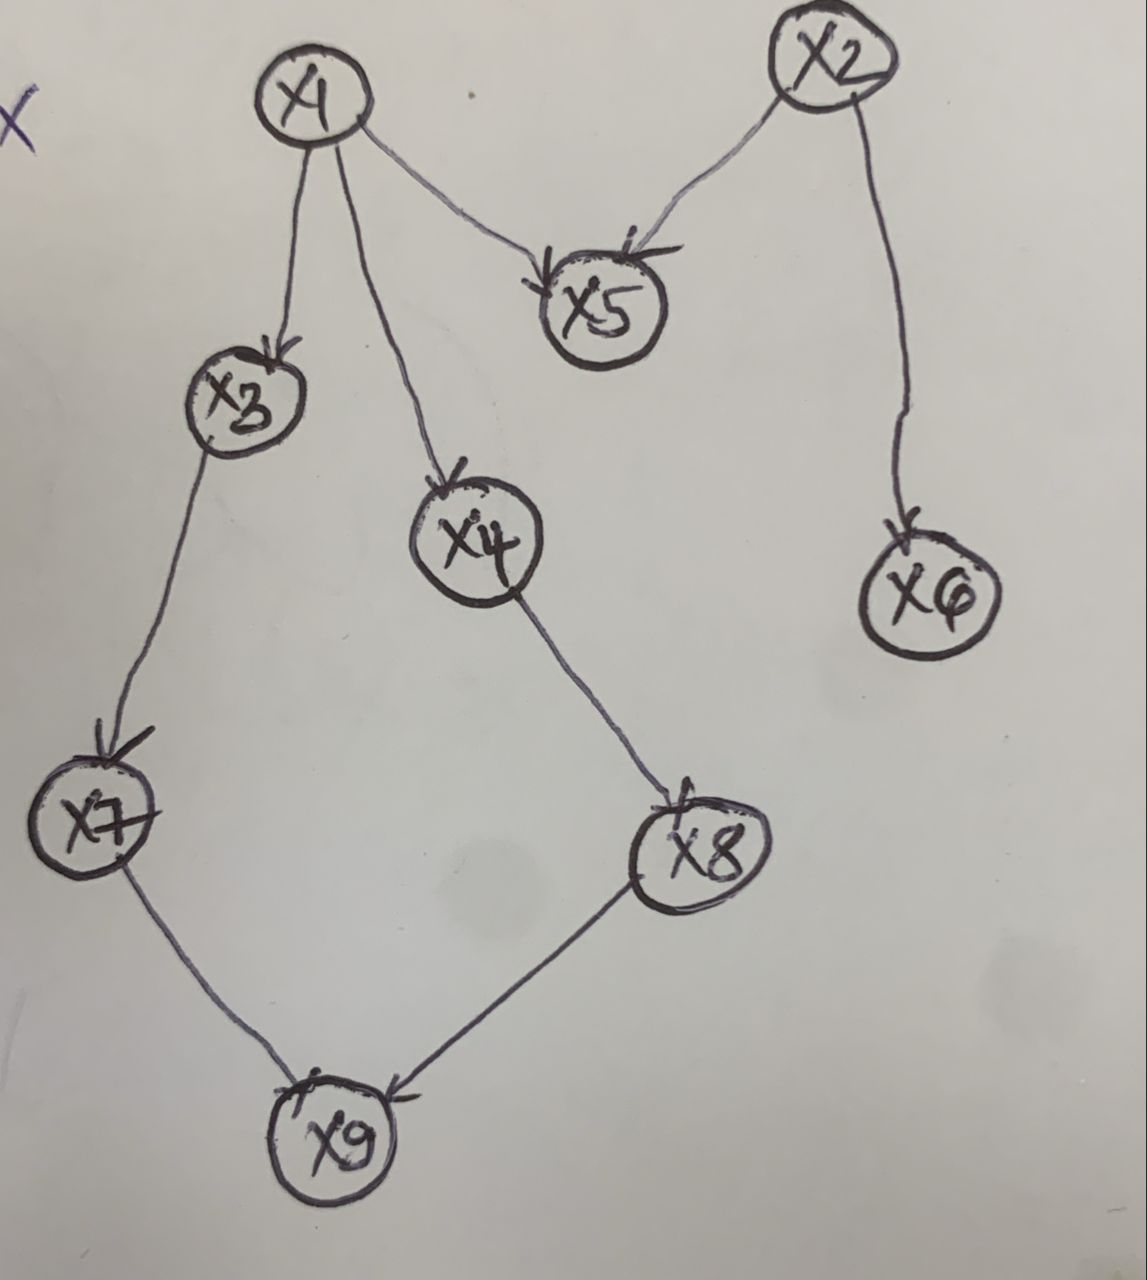

#### (a) Proposing Topological Ordering for the given graph

To get the best topological ordering, we used the principles of topological sorting using Depth First Search algorigthm.
The best topological ordering we came up with is

$$
\boxed{X_1 \to X_2 \to X_5 \to X_3 \to X_4 \to X_6 \to X_7 \to X_8 \to X_9}
$$

#### (b) Local Conditional Independence

●• We know that we have a random variable $X$ which is Markov with respect to the graph $\\$
●• And we also have the topological ordering of the graph in (a)

We can then easily write the local conditional independence of the graph as

$
●• \quad X_3 \perp \{X_2, X_5, X_6, X_7, X_8, X_9\} \mid X_1 \\
●• \quad X_4 \perp \{X_2, X_5, X_6, X_7, X_9\} \mid X_1 \\
●•\quad X_5 \perp \{X_3, X_6, X_7, X_8, X_9\} \mid \{X_1, X_2\} \\
●• \quad X_6 \perp \{X_1, X_3, X_4, X_5, X_7, X_9\} \mid X_2 \\
●• \quad X_8 \perp \{X_1, X_2, X_3, X_5, X_7, X_9\} \mid \{X_4, X_6\} \\
●• \quad X_9 \perp \{X_1, X_2, X_3, X_4, X_5, X_6\} \mid \{X_7, X_8\} \\
$

#### 2. Theorems In Koller and Friedman (2003, Ch. 3)

**(a)** 
If A ⊥ B | C and A ⊥ C | B, then A ⊥ B and A ⊥ C ●• $ \boxed{FALSE} $
> This doesn't hold because A ⊥ C | B locally. But if we don't condition on B, knowing A doesn't give us any information about C, so they are independent. Hence A and C are globally dependant because they are connected through B, i.e A ⊥ C  and B ⊥ A 

**(b)**
E ⊥ C | B ●• $ \boxed{TRUE} $

- In this context, the only possible path from E to C is E-> D-> B-> C.
- In that path, B is a non-collider vertex. 
According to the d-separation rule, if we condition on B which is a non-collider, then the information flow is blocked and we can E and C are d-separated given our observed node B. 

This prepared the conclusion that E ⊥ C | B

This is drawn from the contrapositive of the Theorem 3.4 in Koller and Friedman (2003, Ch. 3, Page 73) which states that <br/>
**Theorem 3.4**
> Let G be a BN structure. If X and Y are not d-separated given Z in G, then X and Y are dependent given Z in some distribution P that factorizes over G.

**(c)**
A ⊥ E | C ●• $ \boxed{FALSE} $

- Again, the intuition here is about d-separation.
- The possible path from A to E is $A→B←B→E$, where B is a collider. And we know that collider blocks the information flow by definition.
- So, if we condition on C, which is a descendant node of B, the information flow is unblocked and activates the path from A to E.
- This implies that A and E are not d-separated given C, which means A and E are dependant given C. Therefore A ⊥ E ∣ C

> We also drawn this from the Theorem 3.4 in Koller and Friedman (2003, Ch. 3, Page 73) given previously.



### Question 2 •● Markov Networks

#### **1. Deriving the Partial Correlation Formula**
In this question, we want to show that

$$
R_{ij} = -\frac{\Theta_{ij}}{\sqrt{\Theta_{ii}\Theta_{jj}}}
$$


- From the infromation given, we know that, 

$$
R_{ij} = \rho(e_i, e_j) = \frac{\text{Cov}(e_i, e_j)}{\sqrt{\text{Var}(e_i)\text{Var}(e_j)}}
$$

- And we are given 

$$
\begin{bmatrix} \Theta_{ii} & \Theta_{ij} \\ \Theta_{ji} & \Theta_{jj} \end{bmatrix}
 = \begin{bmatrix} \text{Var}(e_i) & \text{Cov}(e_i,e_j) \\ \text{Cov}(e_i,e_j) & \text{Var}(e_j) \end{bmatrix}^{-1}.
$$

- Let's call our right hand side matrix A. Then, we have

$$
A = \begin{bmatrix} \text{Var}(e_i) & \text{Cov}(e_i,e_j) \\ \text{Cov}(e_i,e_j) & \text{Var}(e_j) \end{bmatrix}.
$$

- To get $A^-1$, we need its determinant, first. 
$$
det(A) = \text{Var}(e_i)\text{Var}(e_j) - [\text{Cov}(e_i,e_j)]^2.
$$

In line with this, we can write $A^-1$ as

$$
    A^{-1} = \frac{1}{\text{Var}(e_i)\text{Var}(e_j) - [\text{Cov}(e_i,e_j)]^2} \begin{bmatrix} \text{Var}(e_j) & -\text{Cov}(e_i,e_j) \\ -\text{Cov}(e_i,e_j) & \text{Var}(e_i) \end{bmatrix}
$$

By expanding this, we get
$$
 A^-1 =  \begin{bmatrix} \frac{\text{Var}(e_j)}{\text{Var}(e_i)\text{Var}(e_j) - [\text{Cov}(e_i,e_j)]^2} & \frac{-\text{Cov}(e_i,e_j)}{\text{Var}(e_i)\text{Var}(e_j) - [\text{Cov}(e_i,e_j)]^2} \\ \frac{-\text{Cov}(e_i,e_j)}{\text{Var}(e_i)\text{Var}(e_j) - [\text{Cov}(e_i,e_j)]^2} & \frac{\text{Var}(e_i)}{\text{Var}(e_i)\text{Var}(e_j) - [\text{Cov}(e_i,e_j)]^2} \end{bmatrix}
$$
- Now we have

    $$
    \begin{bmatrix} \Theta_{ii} & \Theta_{ij} \\ \Theta_{ji} & \Theta_{jj} \end{bmatrix} = \begin{bmatrix} \frac{\text{Var}(e_j)}{\text{Var}(e_i)\text{Var}(e_j) - [\text{Cov}(e_i,e_j)]^2} & \frac{-\text{Cov}(e_i,e_j)}{\text{Var}(e_i)\text{Var}(e_j) - [\text{Cov}(e_i,e_j)]^2} \\ \frac{-\text{Cov}(e_i,e_j)}{\text{Var}(e_i)\text{Var}(e_j) - [\text{Cov}(e_i,e_j)]^2} & \frac{\text{Var}(e_i)}{\text{Var}(e_i)\text{Var}(e_j) - [\text{Cov}(e_i,e_j)]^2} \end{bmatrix}
    $$



- We can then confidently write

$$
\Theta_{ij} = \Theta_{ji} = -\frac{\text{Cov}(e_i,e_j)}{\text{Var}(e_i)\text{Var}(e_j) - [\text{Cov}(e_i,e_j)]^2}, \tag{1}
$$
And also, 

$$
\left\{
\begin{array}{l}
\Theta_{ii} = \frac{\text{Var}(e_j)}{\text{Var}(e_i)\text{Var}(e_j) - [\text{Cov}(e_i,e_j)]^2}, \\[20pt]
\Theta_{jj} = \frac{\text{Var}(e_i)}{\text{Var}(e_i)\text{Var}(e_j) - [\text{Cov}(e_i,e_j)]^2}.\quad  \tag{2}
\end{array}
\right.
$$



- From our relation (1), we can confidently write
$
\\[5pt]
Cov(e_i,e_j) = -\Theta_{ij} \cdot \left(Var(e_i)Var(e_j) - [Cov(e_i,e_j)]^2\right)
\\[10pt]
$

- To simplify our expression, let's have D as
$$
\\[5pt]
D = \text{Var}(e_i)\text{Var}(e_j) - [\text{Cov}(e_i,e_j)]^2 \Longrightarrow
\text{Cov}(e_i,e_j) = -\Theta_{ij} D. \tag{3}
$$

- At this point, we can substitute $D$ into (2) to get

$$
\Theta_{ii} = \frac{Var(e_j)}{D} \implies Var(e_j) = \Theta_{ii}D \\[10pt] \Theta_{jj} = \frac{Var(e_i)}{D} \implies Var(e_i) = \Theta_{jj} \tag{4}
$$

- This leads us to 
$$
\Theta_{ii}\Theta_{jj} = \frac{Var(e_i)Var(e_j)}{D^2} = \frac{Var(e_i)Var(e_j)}{\text{Var}(e_i)\text{Var}(e_j) - [\text{Cov}(e_i,e_j)]^2} \\[10pt]
\implies D = \frac{\sqrt{Var(e_i)Var(e_j)}}{\sqrt{\Theta_{ii}\Theta_{jj}}}
$$ 

- If we substitute $D$ into (3), we get
$$
\text{Cov}(e_i,e_j) = -\Theta_{ij} \cdot \frac{\sqrt{\text{Var}(e_i)\text{Var}(e_j)}}{\sqrt{\Theta_{ii}\Theta_{jj}}} \tag{5}
$$

- Finally, we are know that the partial correlation between two random variables $X_i$ and $X_j$ is given by  $$\rho(e_i,e_j) = R_{ij} = \frac{\text{Cov}(e_i,e_j)}{\sqrt{\text{Var}(e_i)\text{Var}(e_j)}} \tag{6}$$

- We finally substitute (4) and (5) into (6) to get

$$
R_{ij} = \frac{\text{Cov}(e_i,e_j)}{\sqrt{\text{Var}(e_i)\text{Var}(e_j)}} = \frac{-\Theta_{ij} \cdot \sqrt{\text{Var}(e_i)\text{Var}(e_j)}}{\sqrt{\Theta_{ii}\Theta_{jj}} \cdot \sqrt{\text{Var}(e_i)\text{Var}(e_j)}} = -\frac{\Theta_{ij}}{\sqrt{\Theta_{ii}\Theta_{jj}}}.
$$

#### We can conclude that

### $$\boxed{R_{ij} = -\frac{\Theta_{ij}}{\sqrt{\Theta_{ii}\Theta_{jj}}}}$$



### **2. Zero Partial Correlation Implies Conditional Independence (for Gaussians)**

We suppose that $X \sim \mathcal{N}(\mu, \Sigma)$. If $R_{ij} = 0$ $ \implies \Theta_{ij} = 0$
- Our covariance matrix $\Sigma$ can be written as
$$
\Sigma = \begin{bmatrix}
\Theta_{ii} & \Theta_{ij} \\
\Theta_{ij} & \Theta_{jj}
\end{bmatrix}^{-1}
$$

- We know that the covariance of the residuals of $X_i$ and $X_j$ is also the covariance of $X_i$ and $X_j$ conditional on the rest of the variables. So If $\Theta_{ij} = 0$, we can write

$$
\Sigma = \frac{1}{\Theta_{ii}\Theta_{jj}} \begin{bmatrix}
\Theta_{jj} & 0 \\
0 & \Theta_{ii}
\end{bmatrix}
$$

- This tells us that $ \text{Cov}(X_i, X_j \mid X_{-ij}) = 0$, since the $Cov(e_i, e_j)$ is found on matrix is diagonal, according to our steps in the first question.
- Considering that we are in a family of jointly Gaussian variables, zero covariance **conditional on the rest** implies **conditional independence**. Therefore, we can write
$
X_i \perp X_j \mid X_{-ij}
$

We can now conclude that 
#### $\boxed{R_{ij} = 0 \implies X_i \perp X_j \mid X_{-ij}}$

### Question 3 ●• Variable Elimination

### 3.1 Largest Clique Size (EDHFBAGIC)

To find the largest clique, we made use of the variable elimination algorithm based on the elimination order $E, D, H, F, B, A, G, I, C$.


For each eliminated variables, <br/>
●• We first identified its neighbours <br/>
●• Connected the neighbours to form a clique <br/>
●• Calculated the size of the clique <br/>
●• Then recorded the largest clique size at each step

We summarized the results in the table below

| $Eliminated$ | $Neighbours$   | $Clique Size$ | $Largest \ Clique$ |
|-------------|----------------|--------------|------------------|
| $E$         | $\{D, H, F, B\}$ | $4$          | $4$              |
| $D$         | $\{A, B, F, H, G\}$ | $5$      | $5$              |
| $H$         | $\{G, I, F, B, A\}$ | $5$      | $5$              |
| $F$         | $\{A, B, C, I, G\}$ | $5$      | $5$              |
| $B$         | $\{A, G, I, C\}$ | $4$          | $5$              |
| $A$           | $\{C, G, I\}$ | $3$          | $5$              |
| $G$         | $\{I\}$          | $2$          | $5$              |
| $I$         | $\{C\}$          | $1$          | $5$              |
| $C$         | $\{\emptyset\}$          | $1$          | $5$              |

From the table we obtained, the largest cliques are

$\to \{A, B, F, H, G\}$ <br/>
$\to \{G, I, F, B, A\}$  <br/>
$\to \{A, B, C, I, G\}$   <br/>

These cliques of size $5$ were obtained at the elimination of $D, H, F$ respectively.

$\boxed{Largest \ Clique \ Size = 5}$

### 3.2 Largest Clique Size (AGICDHFBE)

| $Eliminated$ | $Neighbours$   | $Clique Size$ | $Largest$ |
|------------|--------------|-------------|---------|
| $A$          | $\{B, D\}$   | $2$           | $2$       |
| $G$          | $\{D, H\}$   | $2$           | $2$       |
| $I$          | $\{H, F\}$   | $2$           | $2$       |
| $C$          | $\{B, F\}$   | $2$           | $2$       |
| $D$          | $\{E, B, H\}$ | $3$           | $3$       |
| $H$          | $\{B, E, F\}$   | $3$           | $3$       |
| $F$          | $\{B, E\}$   | $2$           | $3$       |
| $B$          | $\{E\}$      | $1$           | $3$       |
| $E$          | $\{\emptyset\}$       | $0$           | $3$       |

Following the elimination order $A, G, I, C, D, H, F, B, E$, we obtained
$ \\ \to \{B, E, H\} \\ $
$ \to \{B, E, F\} \\ $
As the largest cliques!


$\boxed{Largest \ Clique \ Size = 3}$

### 3.3 Optimal Elimination Ordering

- **The optimal elimination order** <br/>

$\to$ Looking at the results we obtained after eliminating variables on our grid using the two given elimination orders, we can see that the largest clique size is $5$ for the first elimination order and $3$ for the second elimination order.

$\to$ The optimal elimination order is of course the one with the lowest clique size. In this case, the second elimination order $AGICDHFBE$ has the lowest clique size of $3$. 

$\to$ From there we can logically infer that the optimal elimination order is $AGICDHFBE$.

- **Justification** <br/>

The order $AGICDHFBE$ has the lowest clique size of $3$ which is the smallest clique size among the two elimination orders. This makes it the optimal elimination order. This is because in the elimination process, we want to eliminate variables in the order that create the smallest possible clique size to minimize the tree width of the induced graph, thereby making the computation of the marginal probabilities easier and faster.

### 3.4 Elimination Complexity for a $n$ x $n$ Grid

If we have a nxn grid, it implies we have grid with n² nodes.

- The best way we can eliminate the nodes is to eliminate nodes row-by-row or column-by-column. 

- If we first eliminate all nodes in the top row. When a node in this row is eliminated, its neighbors are in the same row and in the row immediately below, therefore the new edges introduced by connecting its neighbors affects only nodes in at most two neighbour rows. 

- After eliminating the entire first row, the worst-case scenario is that the nodes in the second row become fully connected;
And since there are only n nodes in any row, logically the largest clique formed is of size n. 

- And we know that Since the $treewidth = largest \ clique - 1$, this elimination order gives us a treewidth of at most $n − 1$. 


**We can then conclude that even if the grid has n² nodes, the treewidth is bounded above by a linear complexity O(n), which is much smaller than n².**